# Qanvast, Interior Design Vendor Management System

This personal project appeals to identify the top vendors and user sentiment across Interior Design (ID) Company in Singapore. Qanvast is a renovation platform for user to seek inspiration and get matched with vendor locally in Singapore based on the budget requirement and attain several vendor quotations for user review prior to engagement. 

Using Natural Language Processing to identify the sentiment and ratings across listed vendors and identify room for improvement, otherwise interference may be required to retain a pool of high-quality approved vendor list. 

# Notebook Brief

This notebook contains the data extraction, cleaning and basic exploratory on the data features. Preprocessing on reviews and text will be in upcoming notebook.

Note: If you have yet to see the next notebook, it is in progress at the moment. 

## 1.0 Data Extraction

Data is extracted from Qanvast website as follow. All private information are removed prior to any processing to protect user identity and information.

In [3]:
import requests
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

Below function is commented after scrapping to avoid repeat data extraction. 

In [2]:
# def convert_header(req_string):
#     req_string = req_string.split('\n')[1:]
#     header_dict = {line.split(':')[0]: line.split(':')[1].strip() for line in req_string}
#     return header_dict

In [3]:
# post_request = '''GET /api/user-review/listing/ HTTP/1.1
# Accept: application/json
# Content-Type: application/json
# Cookie: csrfToken=VHm2U5Zq-oFfD86kHGL2q5r36p_so3U7lg3U; isAuthenticated=false; sessionId=s%3A74c83556-5789-4987-99fe-84234bd113a1.JwnE9HctOV7VJX%2BDmauLDOG0om6Xhk5iteyLifVQl0s; userId=s%3A.2rfFf2Srfq8%2FKgdTCf9%2BPMzyieye72ZCLY64mCrGq%2F8; _fbp=fb.1.1623470714390.298313568; intercom-id-gcgemb36=2657f845-dc63-49c0-aaa1-a2e8be41cd24; intercom-session-gcgemb36=; _ga=GA1.2.586355766.1623470717; _gid=GA1.2.1586810512.1623470717; _uetsid=6544efb0cb3311ebb377714e0068f2bc; _uetvid=654500d0cb3311eb9eb0439952fb3f62; __atuvc=2%7C23; __atuvs=60c4327ca5d4cd21001; __asc=4f8e3071179fe652cbb5ed22acc; __auc=4f8e3071179fe652cbb5ed22acc; isRenoCalcShown=true; AWSELB=7DC7EFB112582530CA6573B705B4E49313D71D47E86026E5FB1B29DC6629DF7542A9A99EC36A882CF275AD69005BF24C1149C057CF3EEAF9A7E5D2BC1341D71B9162B2383A; AWSELBCORS=7DC7EFB112582530CA6573B705B4E49313D71D47E86026E5FB1B29DC6629DF7542A9A99EC36A882CF275AD69005BF24C1149C057CF3EEAF9A7E5D2BC1341D71B9162B2383A
# Accept-Encoding: gzip, deflate, br
# Host: qanvast.com
# User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.3 Safari/605.1.15
# Referer: https://qanvast.com/sg/reviews
# Accept-Language: en-sg
# Connection: keep-alive
# X-XSRF-TOKEN: VHm2U5Zq-oFfD86kHGL2q5r36p_so3U7lg3U'''

# headers = convert_header(post_request)

In [4]:
## EXTRACTING FILES COMMENTED DATED 12 JUN

# final_dict = []
# loop = 849
# max_sleep_time = 10

# for page_num in range(loop):
#     sleep_time = random.random() * max_sleep_time
#     remain_page = loop - page_num
#     print('\rWaiting... {} loop remaining... '.format(remain_page), end='.')
#     url = f'https://qanvast.com/api/user-review/listing/?page={page_num+1}&populate%5Buser%5D=true&populate%5Breviewee%5D=true&populate%5BprojectImages%5D=true'
#     while True:
#         try:
#             response = requests.get(url, headers=headers)
#             if response.status_code == 200:
#                 final_dict += response.json()['data']
#                 final_df = pd.DataFrame(final_dict)
#                 final_df.to_csv('../data/qanvast.csv', index=False)
#             else:
#                 print('Failed at loop #{}...'.format(page_num))
#         except:
#             continue
#         break
#     time.sleep(sleep_time)

## 2.0 Data Cleaning 

Upon extraction, data imported for simple data cleaning to ensure the sanity of the extracted data. 

In [5]:
#read from extracted csv dated 12 Jun
final_df = pd.read_csv('./data/qanvast.csv')

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8480 entries, 0 to 8479
Data columns (total 29 columns):
id                         8480 non-null int64
content                    8480 non-null object
isPublished                8480 non-null bool
revieweeId                 8480 non-null int64
reviewerId                 5424 non-null float64
reviewOf                   8480 non-null object
projectCompletionDate      8480 non-null object
projectCost                1364 non-null float64
title                      8480 non-null object
country                    8478 non-null object
currency                   520 non-null object
designRating               8480 non-null int64
workmanshipRating          8480 non-null int64
professionalismRating      8480 non-null int64
projectManagementRating    8480 non-null int64
designerName               6576 non-null object
isVerified                 8480 non-null bool
revieweeResponse           21 non-null object
oneWeekEmail               8480 non-null

In [8]:
#dropna unlisted company in company col
final_df.dropna(subset=['company'], axis=0,inplace=True)

Column `company` contains a dictionary containing the interior designer company names. We will extract the company names and other information will not be kept.

In [9]:
# error handling for company col into dict
import ast
final_df['company'] = final_df['company'].apply(ast.literal_eval)

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8416 entries, 0 to 8479
Data columns (total 29 columns):
id                         8416 non-null int64
content                    8416 non-null object
isPublished                8416 non-null bool
revieweeId                 8416 non-null int64
reviewerId                 5360 non-null float64
reviewOf                   8416 non-null object
projectCompletionDate      8416 non-null object
projectCost                1362 non-null float64
title                      8416 non-null object
country                    8414 non-null object
currency                   520 non-null object
designRating               8416 non-null int64
workmanshipRating          8416 non-null int64
professionalismRating      8416 non-null int64
projectManagementRating    8416 non-null int64
designerName               6512 non-null object
isVerified                 8416 non-null bool
revieweeResponse           21 non-null object
oneWeekEmail               8416 non-null

In [11]:
#get company name from dict
final_df.company = final_df.company.apply(lambda x: x['name'])

In [12]:
final_df.columns

Index(['id', 'content', 'isPublished', 'revieweeId', 'reviewerId', 'reviewOf',
       'projectCompletionDate', 'projectCost', 'title', 'country', 'currency',
       'designRating', 'workmanshipRating', 'professionalismRating',
       'projectManagementRating', 'designerName', 'isVerified',
       'revieweeResponse', 'oneWeekEmail', 'offlineUserName',
       'qanvastResponse', 'createdAt', 'updatedAt', 'averageRating', 'Company',
       'reviewer', 'projectImages', 'company', 'unlistedCompany'],
      dtype='object')

Other columns are dropped as either they have lack of informative data and / or removed as ethical reasons due to privacy. 

In [13]:
#column selection
#drop cols
final_df = final_df.drop(columns=['id','currency', 'isPublished','revieweeId','reviewerId','reviewOf','isVerified','oneWeekEmail','offlineUserName','qanvastResponse','revieweeResponse','Company','reviewer','projectImages','unlistedCompany','updatedAt','designerName'])

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8416 entries, 0 to 8479
Data columns (total 12 columns):
content                    8416 non-null object
projectCompletionDate      8416 non-null object
projectCost                1362 non-null float64
title                      8416 non-null object
country                    8414 non-null object
designRating               8416 non-null int64
workmanshipRating          8416 non-null int64
professionalismRating      8416 non-null int64
projectManagementRating    8416 non-null int64
createdAt                  8416 non-null object
averageRating              8416 non-null float64
company                    8416 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 854.8+ KB


Above columns are retained for Exploratory Data Analysis.

## 3.0 Exploratory Data Analysis

### Project Cost

In [15]:
final_df.projectCost.fillna(0,inplace=True)

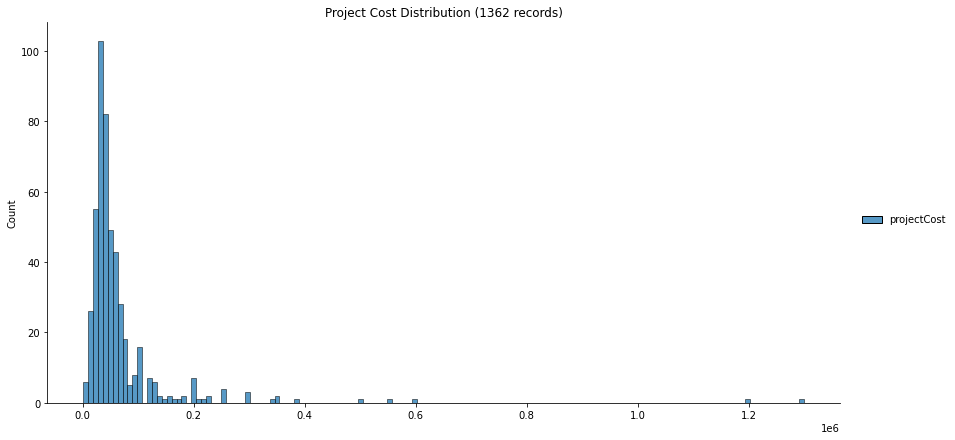

In [16]:
temp_df = final_df[final_df.projectCost > 0][['projectCost']]

sns.displot(data=temp_df,aspect=2,height=6,)
plt.title('Project Cost Distribution (1362 records)')
plt.show()

## Country

In [17]:
#replace country with SG
final_df.country = final_df.country.fillna('SG')
final_df.reset_index(drop=True, inplace=True)

## Company

In [19]:
#remove chinese character
test = final_df.company.str.replace(r'[^\s\x00-\x7F ]+', '')
#remove white space
final_df.company = test.str.strip()

In [20]:
total_reviews = pd.Series(final_df['company'].value_counts()).to_dict()
final_df['total_reviews'] = final_df.company.apply(total_reviews.get)

In [21]:
#create dict on value counts
# total_reviews = pd.Series(final_df['company'].value_counts()).to_dict()

# review = []
# for i in range(len(final_df)):
#     for k, v in total_reviews.items():
#         if k == final_df.company[i]:
#             review.append(v)

# final_df['total_reviews'] = review

In [22]:
final_df.head()

,content,projectCompletionDate,projectCost,title,country,designRating,workmanshipRating,professionalismRating,projectManagementRating,createdAt,averageRating,company,total_reviews
0,I'm thankful to Thomas for providing a compreh...,2021-07-31T16:00:00.000Z,0.0,Review of Thomas from Todz'Terior,SG,5,5,5,5,2021-05-31T13:44:41.680Z,5.0,TodzTerior,15
1,The good feeling and vibes started with our fi...,2021-05-31T16:00:00.000Z,0.0,Positive ID experience from beginning to end o...,SG,4,4,5,5,2021-06-11T16:06:49.292Z,4.5,9 Creation,63
2,It was a fuss free and enjoyable renovation jo...,2021-05-31T16:00:00.000Z,0.0,Great Job!,SG,4,5,4,5,2021-06-11T08:14:39.625Z,4.5,Ciseern,49
3,I highly recommend Interior Times.I found the ...,2021-05-31T16:00:00.000Z,0.0,Renovation of 4 room BTO,SG,5,5,5,5,2021-06-11T06:10:02.773Z,5.0,Interior Times,90
4,Engaged Luova Project Services for a total rev...,2021-05-31T16:00:00.000Z,0.0,Went beyond their way to ensure everything is ...,SG,5,5,5,5,2021-06-10T05:37:44.982Z,5.0,Luova Project Services,26


## Completion and posted date

In [23]:
#func to convert values to datetime format
def convert_dt(df, col):
    df[col] = pd.to_datetime(df[col])

In [24]:
#convert completion time, created review and updated review time
convert_dt(final_df, 'projectCompletionDate')
convert_dt(final_df, 'createdAt')

In [25]:
final_df.createdAt.dt.date.min()

datetime.date(2014, 10, 13)

In [26]:
final_df.createdAt.dt.date.max()

datetime.date(2021, 6, 11)

In [27]:
final_df.projectCompletionDate.dt.date.min()

datetime.date(2015, 9, 30)

In [28]:
final_df.projectCompletionDate.dt.date.max()

datetime.date(2021, 7, 31)

In [29]:
# reset index after remove na
final_df.reset_index(drop=True, inplace=True)

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 13 columns):
content                    8416 non-null object
projectCompletionDate      8416 non-null datetime64[ns, UTC]
projectCost                8416 non-null float64
title                      8416 non-null object
country                    8416 non-null object
designRating               8416 non-null int64
workmanshipRating          8416 non-null int64
professionalismRating      8416 non-null int64
projectManagementRating    8416 non-null int64
createdAt                  8416 non-null datetime64[ns, UTC]
averageRating              8416 non-null float64
company                    8416 non-null object
total_reviews              8416 non-null int64
dtypes: datetime64[ns, UTC](2), float64(2), int64(5), object(4)
memory usage: 854.9+ KB


In [31]:
final_df.projectCompletionDate.dt.month

0       7
1       5
2       5
3       5
4       5
       ..
8411    9
8412    9
8413    9
8414    9
8415    9
Name: projectCompletionDate, Length: 8416, dtype: int64

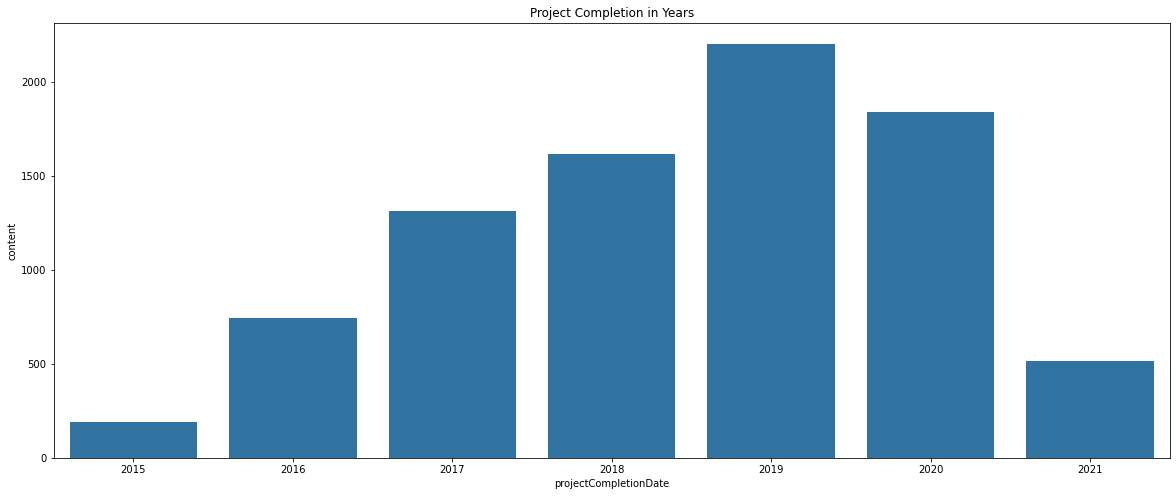

In [32]:
#project completion
plt.figure(figsize=(20,8))
temp_df = final_df.resample('Y', on='projectCompletionDate').count()[['content']].reset_index()
sns.barplot(data=temp_df, x=temp_df.projectCompletionDate.dt.year, y= temp_df.content, color='tab:blue')
plt.title('Project Completion in Years')
plt.show()

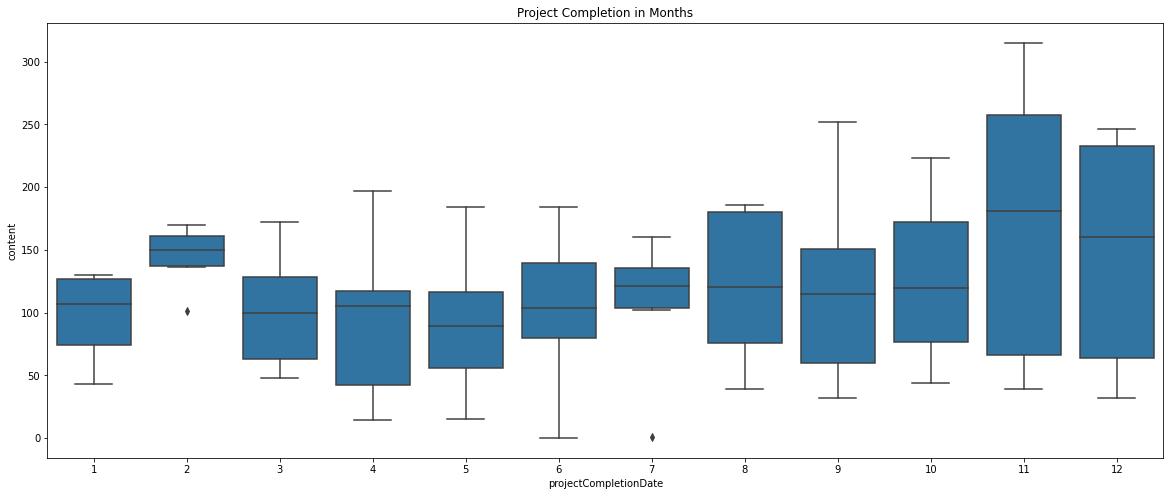

In [33]:
#completion by months
plt.figure(figsize=(20,8))
temp_df = final_df.resample('M', on='projectCompletionDate').count()[['content']].reset_index()
sns.boxplot(data=temp_df, x=temp_df.projectCompletionDate.dt.month, y= temp_df.content, color='tab:blue')
plt.title('Project Completion in Months')
plt.show()

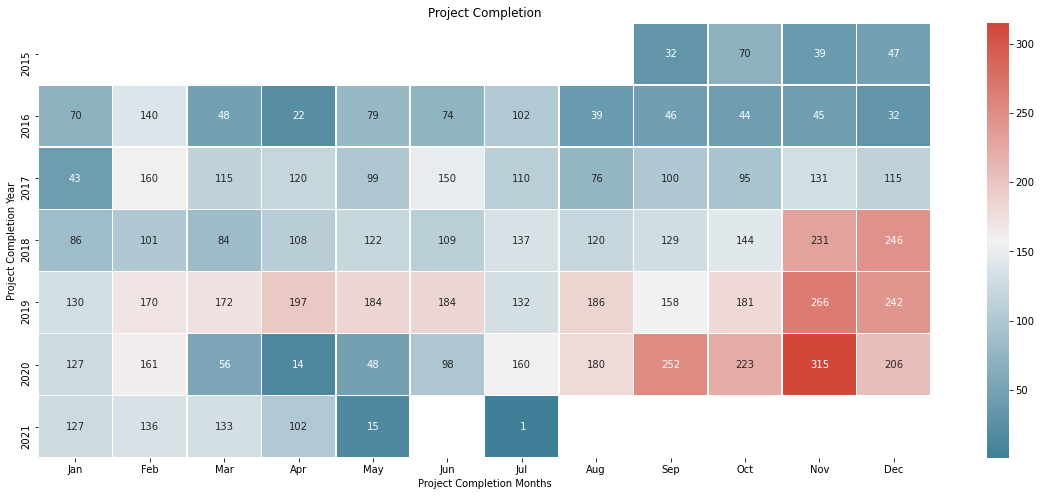

In [34]:
plt.figure(figsize=(20,8))
cmap = sns.diverging_palette(225,15,as_cmap=True)
temp_df = final_df.groupby([(final_df.projectCompletionDate.dt.year),(final_df.projectCompletionDate.dt.month)]).count()[['content']].unstack()
sns.heatmap(data=temp_df, annot=True, cmap=cmap, linewidths=.5, xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fmt='2g')
plt.title('Project Completion')
plt.ylabel('Project Completion Year')
plt.xlabel('Project Completion Months')
plt.show()

## Review

In [35]:
final_df.head()

,content,projectCompletionDate,projectCost,title,country,designRating,workmanshipRating,professionalismRating,projectManagementRating,createdAt,averageRating,company,total_reviews
0,I'm thankful to Thomas for providing a compreh...,2021-07-31 16:00:00+00:00,0.0,Review of Thomas from Todz'Terior,SG,5,5,5,5,2021-05-31 13:44:41.680000+00:00,5.0,TodzTerior,15
1,The good feeling and vibes started with our fi...,2021-05-31 16:00:00+00:00,0.0,Positive ID experience from beginning to end o...,SG,4,4,5,5,2021-06-11 16:06:49.292000+00:00,4.5,9 Creation,63
2,It was a fuss free and enjoyable renovation jo...,2021-05-31 16:00:00+00:00,0.0,Great Job!,SG,4,5,4,5,2021-06-11 08:14:39.625000+00:00,4.5,Ciseern,49
3,I highly recommend Interior Times.I found the ...,2021-05-31 16:00:00+00:00,0.0,Renovation of 4 room BTO,SG,5,5,5,5,2021-06-11 06:10:02.773000+00:00,5.0,Interior Times,90
4,Engaged Luova Project Services for a total rev...,2021-05-31 16:00:00+00:00,0.0,Went beyond their way to ensure everything is ...,SG,5,5,5,5,2021-06-10 05:37:44.982000+00:00,5.0,Luova Project Services,26


In [37]:
final_df['reviews'] = final_df.title + ' ' + final_df.content

In [39]:
final_df.drop(columns=['title','content'], inplace=True)

In [41]:
final_df.reviews

0       Review of Thomas from Todz'Terior I'm thankful...
1       Positive ID experience from beginning to end o...
2       Great Job! It was a fuss free and enjoyable re...
3       Renovation of 4 room BTO I highly recommend In...
4       Went beyond their way to ensure everything is ...
                              ...                        
8411    Chuan Jin Over a span of 6 months, I've spoken...
8412    Niki & Daniel We chanced upon Posh Living's Fa...
8413    Jiahe Marina was one of my school friends and ...
8414    Ople When we went to Blackjack's showroom, we ...
8415    Rainforest Through Qanvast, we were looking ar...
Name: reviews, Length: 8416, dtype: object

In [42]:
final_df.to_csv('./cleaned_qvst.csv',index=False)